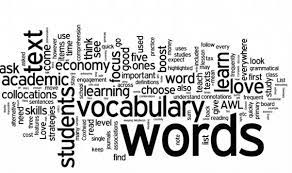

# import data

In [ ]:
import pandas as pd
import os
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import pickle
import pyLDAvis.sklearn
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import numpy as np
import pandas as pd
df_train=pd.read_csv('/kaggle/input/coleridgeinitiative-show-us-the-data/train.csv')
df_train.head()

In [ ]:
np.random.seed(0) 

In [ ]:
missing_values_count = df_train.isnull().sum()
missing_values_count

In [ ]:
total_cells = np.product(df_train.shape)
total_missing = missing_values_count.sum()
total_missing

In [ ]:
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)



In [ ]:
columns_with_na_dropped = df_train.dropna(axis=1)
columns_with_na_dropped.head()



In [ ]:
print("Columns in original dataset: %d \n" % df_train.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])


In [ ]:
df_train.shape

In [ ]:
print('Total rows in the train data set are :'+str(len(df_train)))

show id, pub_title &data set title

In [ ]:
for col in df_train.columns:
    print(f"{col}: {len(df_train[col].unique())}")

In [ ]:
df_train['dataset_title'].value_counts()

In [ ]:
df_test=pd.read_csv('/kaggle/input/coleridgeinitiative-show-us-the-data/sample_submission.csv')
df_test

In [ ]:
# get a small subset of the df_train dataset

subset_nfl_data = df_train.loc[:, 'Id':'pub_title'].head()
subset_nfl_data


In [ ]:
words =list( df_train['pub_title'].values)
words=[word.split() for word in words]
#words

In [ ]:
allwords = []
for wordlist in words:
    allwords += wordlist

In [ ]:
mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words in Data Label', fontsize=50)
plt.tight_layout(pad=0)
plt.show()

In [ ]:
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Freq of 25 Most Common Words in Data-Label', fontsize=60)
plt.show()

In [ ]:
df_test_input = pd.DataFrame(columns=['id','section_title','text'])
ids=df_test['Id'].values
import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')
#len(ids)
for id in ids:
    df=pd.read_json ('../input/coleridgeinitiative-show-us-the-data/test/{}.json'.format(id))
    df.loc[:,['id']] = id
    df.reset_index(inplace=True,drop=True)
    df_test_input=pd.concat([df_test_input, df], ignore_index=True)
    df_test_input.reset_index(inplace=True,drop=True) 

In [ ]:
def clean_text(txt):
    return re.sub('[^A-Za-z0-9]+', ' ', str(txt).lower()).strip()
submission_df = pd.read_csv('../input/coleridgeinitiative-show-us-the-data/sample_submission.csv', index_col=0)
submission_df